# Downloading data

## A.1 Libraries you most likely have installed

In [11]:
# Import libraries
library(dplyr)
library(ggplot2)

## A.2 Libraries you may not have

In [12]:
library(downloader) #Downloads files from the internet
library(readxl) #Reads excel files
library(Quandl) #Various data sources (IMF, FRED, WDI, BIS)
#library(WDI) #World bank data
library(magrittr) # pipe operations
library(lubridate) # date operations

# 1. Download directly from website links

## 1.1. Using downloader package

In [3]:
#install.packages("downloader")
library(downloader) #Downloads files from the internet
library(readxl) #Reads excel files

In [4]:
url = "http://www.macrohistory.net/JST/JSTdatasetR4.xlsx"
file_name = "macrohistory.xlsx"
download.file(url, file_name)
macro_df = read_excel(file_name, sheet = 2)
macro_df %>% head(4)

year,country,iso,ifs,pop,rgdpmad,rgdppc,rconpc,gdp,iy,...,eq_capgain,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
1870,Australia,AUS,193,1775,3273.239,13.83616,21.44973,208.78,0.1092656,...,-0.07004543,0.07141703,NA,NA,NA,0.04911817,0.06641459,NA,NA,NA
1871,Australia,AUS,193,1675,3298.507,13.93686,19.93080,211.56,0.1045791,...,0.04165363,0.06546638,NA,NA,NA,0.04844633,0.06819329,NA,NA,NA
1872,Australia,AUS,193,1722,3553.426,15.04425,21.08501,227.40,0.1304380,...,0.10894547,0.06299735,NA,NA,NA,0.04737350,0.06986062,NA,NA,NA
1873,Australia,AUS,193,1769,3823.629,16.21944,23.25491,266.54,0.1249862,...,0.08308647,0.06448419,NA,NA,NA,0.04671958,0.06984195,NA,NA,NA


## 1.2 From github

In [5]:
url = "https://raw.githubusercontent.com/corybaird/Development_economics/master/TA_Sessions/Python/Week_1/Covid_TS_global.csv"
df = read.csv(url)
df %>% head(3)

X,country,date,confirmed,deaths,recovered
1,Afghanistan,2020-01-22,0,0,0
2,Afghanistan,2020-01-23,0,0,0
3,Afghanistan,2020-01-24,0,0,0


# 2. Quandl
- Register for an API in [Quandl](https://www.quandl.com/)
- After you register click find your api key under account settings

In [6]:
install.packages('Quandl')
library(Quandl)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [7]:
api = "YOURAPIKEY"
Quandl.api_key(api)

## 2.1 IMF macroeconomic data

In [8]:
# 1. IMF Cross Country Macroeconomic Statistics
car_df = Quandl(c('ODA/CAF_NGDP_D','ODA/CAF_LP'), column_index='1', start_date='1990-12-31', end_date='2019-12-31')

# 1.1. Rename columns
car_df = car_df %>%rename("GDP"=2, "Population"=3)
head(car_df,3)

Date,GDP,Population
1990-12-31,67.846,2.913
1991-12-31,65.909,2.980
1992-12-31,63.927,3.051


## 2.2 Federal reserve data

In [9]:
# 2.Federal Reserve Data (US macro data)
UR_df = Quandl(c('FRED/UNRATEMD','FRED/GDPC1MD','FRED/PCECTPIMD'), column_index='1') %>%as_tibble()
head(UR_df)

Date,FRED.UNRATEMD - Value,FRED.GDPC1MD - Value,FRED.PCECTPIMD - Value
2019-01-01,3.6,2.2,1.5
2020-01-01,3.5,2.0,1.9
2021-01-01,3.6,1.9,2.0
2022-01-01,3.7,1.8,2.0


## 2.3 Bank of England data (Worldwide FX rates, etc)

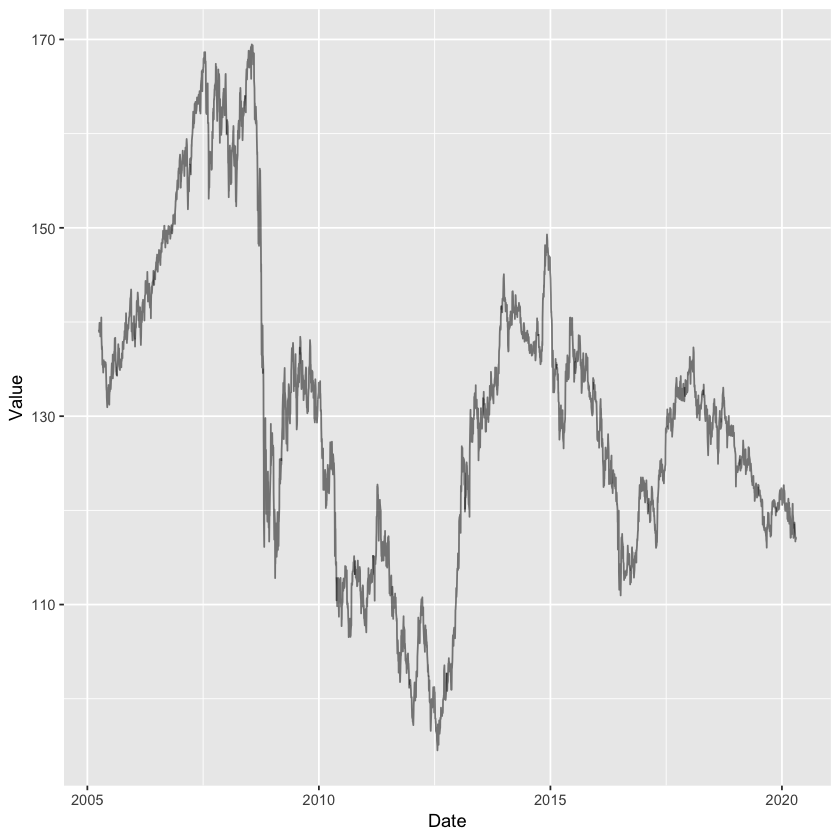

In [10]:
# 3.Bank of England (Exchange rates, etc)
yen_df = Quandl('BOE/XUDLBK63', column_index='1') %>%as_tibble()
yen_df %>% ggplot(aes(x=Date, y=Value)) + geom_line(alpha=0.5)

# 3. WDI

In [96]:
#install.packages('WDI')
library(WDI)

## 3.1 Basic search

### 3.1.1 By string in $\rightarrow$ name

In [ ]:
oil_search = WDIsearch(string = "oil", field = "name")
#typeof(oil_search)
head(oil_search,2)

### 3.1.2 By string in $\rightarrow$ indicator

oil_search = WDIsearch(string = "oil", field = "indicator")
head(oil_search,2)

## 3.2 Advanced search

### 3.2.1 By string with "gdp...capita...US"

In [ ]:
WDIsearch(string="gdp.*capita.*US\\$", field = "name")

### 3.2.2 By string that starts with "GDP growth"

In [ ]:
WDIsearch("^GDP growth")

# 3.3 Downloading data

## 3.1 GDP data
### 3.1.1 Search for GDP data

In [ ]:
gdp_search = WDIsearch(string="gdp.*capita.*US\\$", field = "name")
indicators = as_tibble(gdp_search)%>%select('indicator')

### 3.2.2 Download data

In [ ]:
gdp_df = WDI(indicator=indicators$indicator, country=c('MX','CA','US'),start=1960, end=2012)

### 3.2.3 Plot data

In [ ]:
library(ggplot2)
ggplot(gdp_df, aes(year, NY.GDP.PCAP.KD, color=country)) + geom_line() + 
  xlab('Year') + ylab('GDP per capita')

## 3.3 Download dataset plus other indicators of country with "extra=TRUE"

In [ ]:
gdp_extra_df = WDI(country=c("US","BR"), indicator="NY.GNS.ICTR.GN.ZS", start=1999, end=2000,
               extra=TRUE)

## 3.4 Write to csv file for excel

In [ ]:
write.csv(gdp_extra_df, 'gdp.csv')

# 4. Download Covid data set
- Code written by Yanchang Zhao ([Tutorial link](https://78462f86-a-e2d7344e-s-sites.googlegroups.com/a/rdatamining.com/www/docs/Coronavirus-data-analysis-world.pdf?attachauth=ANoY7cqJT0nbJKeZs1mCM4hxnCX2e-25BoUb0DEWmQtzVgAHcP5QmliFhEcI-8x2x6DVFMP_e2y2du3NL2VCJNTY2tRKrWM73hQd0lAAWmdPYC0UNKJkLrJc2D3-4TG6Ri_jvgCcRSb5mRRUK0L3jWtbnIYk68-V6sXZ-w80u48XomrpnBMnTAQ95rfcD96z1nSZ__buvPXfct8GuxvHdSLcEy0chWzCxQVP4wxVzdBG1lMOBp2uNsI%3D&attredirects=1))

In [106]:
library(magrittr) # pipe operations
library(lubridate) # date operations

In [ ]:
#Downloads from the following dataset on github
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
filenames <- c('time_series_covid19_confirmed_global.csv',
               'time_series_covid19_deaths_global.csv',
               'time_series_covid19_recovered_global.csv')
url.path <- paste0('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/',
                   'master/csse_covid_19_data/csse_covid_19_time_series/')

dir.create("data")
## download files to local directory
download <- function(filename) {
  url <- file.path(url.path, filename)
  dest <- file.path('./data', filename)
  download.file(url, dest)
}
bin <- lapply(filenames, download)

#Each row corresponds to country/region/province/state. 
#Column corresponds to a single day. 
raw.data.confirmed <- read.csv('./data/time_series_covid19_confirmed_global.csv') 
raw.data.deaths <- read.csv('./data/time_series_covid19_deaths_global.csv') 
raw.data.recovered <- read.csv('./data/time_series_covid19_recovered_global.csv')


#3.1 Data Cleaning
cleanData <- function(data) {
  ## remove some columns
  data %<>% select(-c(Province.State, Lat, Long)) %>% rename(country=Country.Region)
  ## convert from wide to long format
  data %<>% gather(key=date, value=count, -country)
  ## convert from character to date
  data %<>% mutate(date = date %>% substr(2,8) %>% mdy())
  ## aggregate by country
  data %<>% group_by(country, date) %>% summarise(count=sum(count, na.rm=T)) %>% as.data.frame()
  return(data)
}


## clean the three datasets
data.confirmed <- raw.data.confirmed %>% cleanData() %>% rename(confirmed=count) 
data.deaths  <- raw.data.deaths %>% cleanData() %>% rename(deaths=count)
data.recovered <- raw.data.recovered %>% cleanData() %>% rename(recovered=count)
